<a href="https://colab.research.google.com/github/fuzailibnahmed/Finance-Trends/blob/main/FinanceTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# setting visual style
sns.set_style('darkgrid')
sns.set_palette('rainbow')

In [3]:
#loading dataset
df=pd.read_csv('/content/drive/MyDrive/Finance project/Finance Trends.csv')

#basic info of data set
print("shape of the dataset", df.shape)
df.head()

shape of the dataset (12000, 24)


,Gender,Age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Male,29,Yes,2,4,7,5,3,1,6,...,Less than 1 year,Weekly,20%-30%,Public Provident Fund,Health Care,Dividend,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines
1,Male,28,Yes,2,3,6,5,1,4,7,...,Less than 1 year,Weekly,30%-40%,Public Provident Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Television
2,Female,28,Yes,2,3,7,5,4,1,6,...,3-5 years,Daily,10%-20%,Mutual Fund,Health Care,Dividend,Better Returns,Assured Returns,Risk Free,Financial Consultants
3,Male,19,Yes,2,3,7,4,6,1,5,...,More than 5 years,Monthly,10%-20%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
4,Male,32,Yes,2,4,7,5,3,1,6,...,More than 5 years,Weekly,10%-20%,Public Provident Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants


In [13]:
#checking for missing values
df.isnull().sum()

#fill or drop misssing data
df.fillna(df.median(numeric_only=True))

#numeric
df= df.fillna(df.mode().iloc[0])

#removing duplicates
df= df.drop_duplicates()

print("shape after cleaning", df.shape)

shape after cleaning (10389, 24)


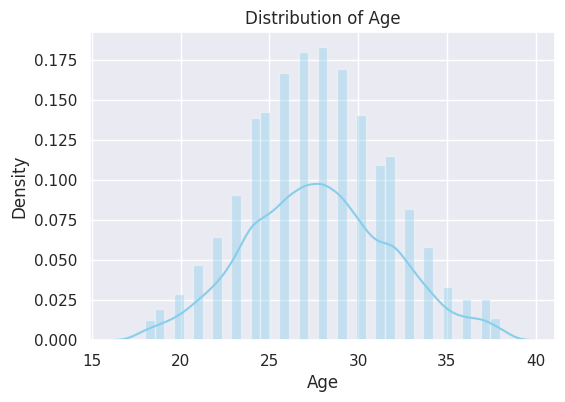

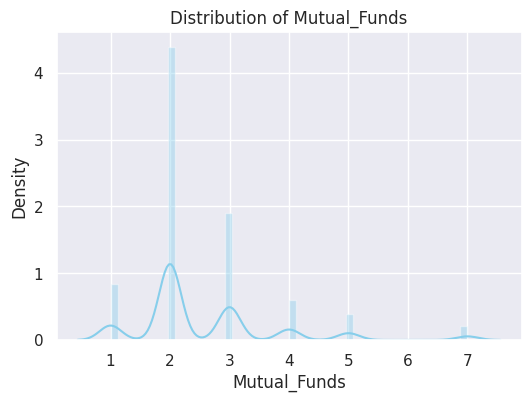

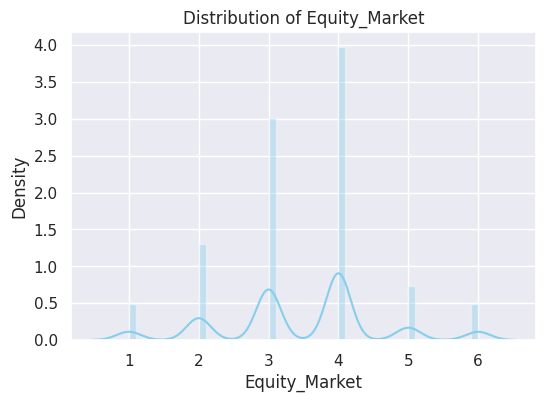

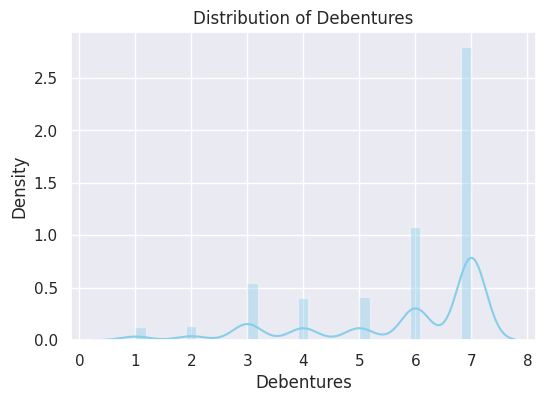

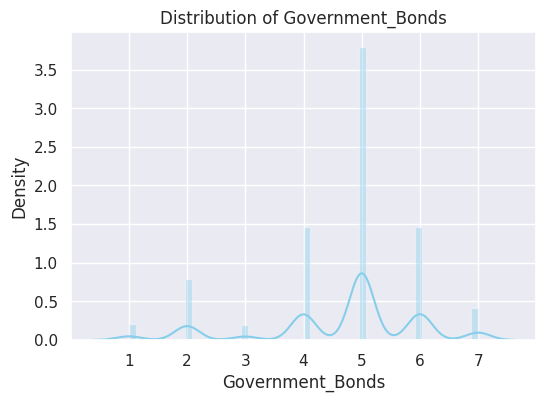

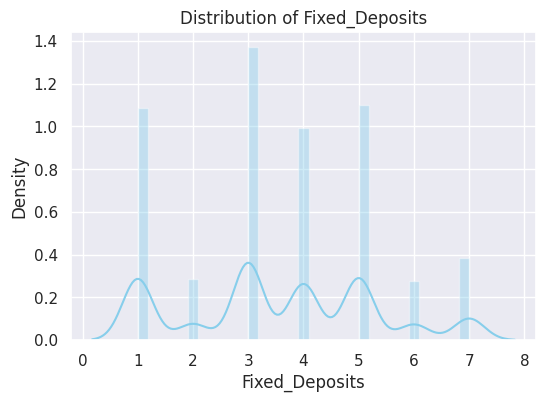

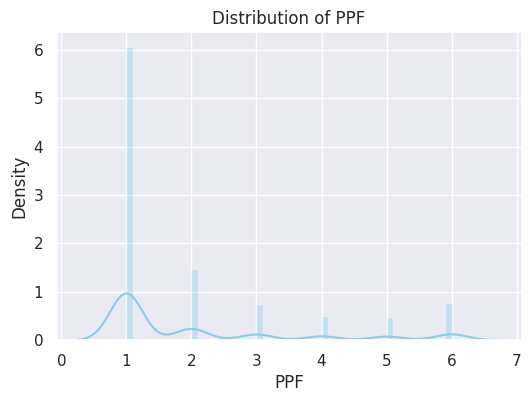

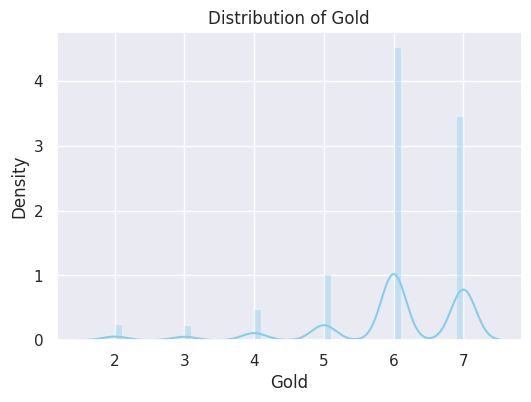

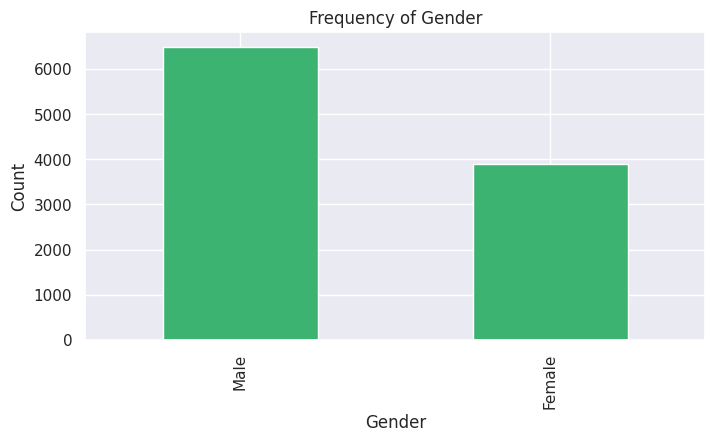

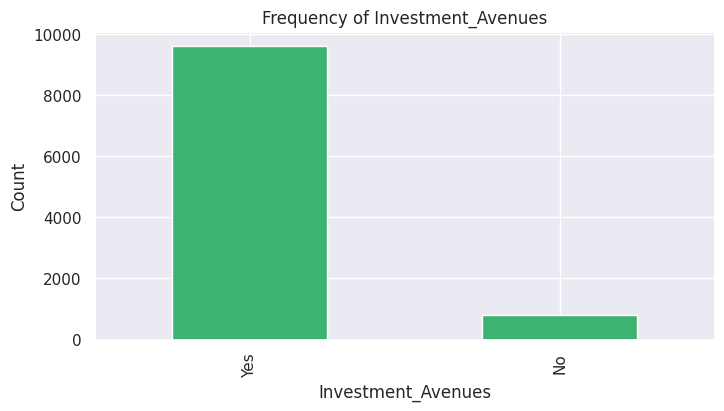

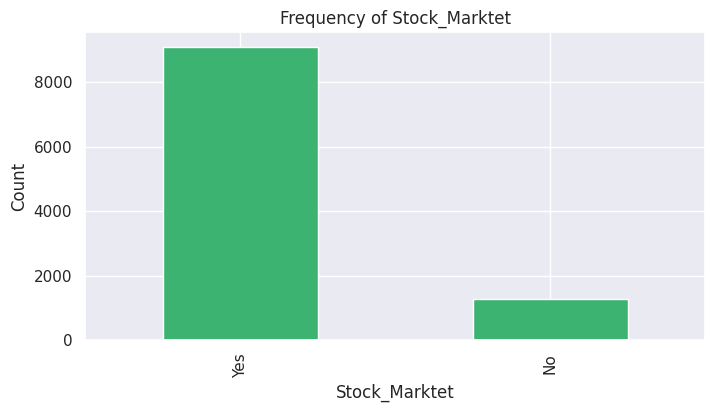

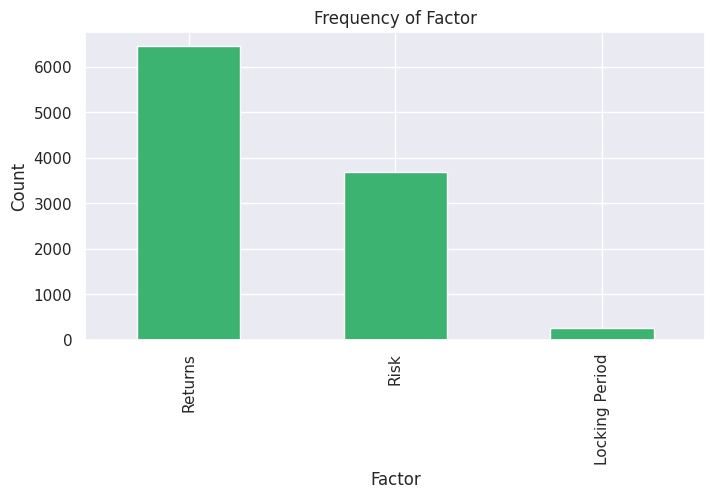

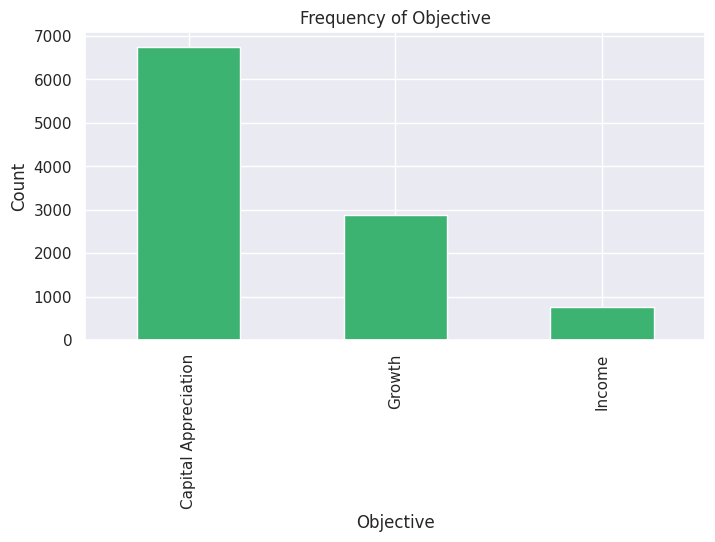

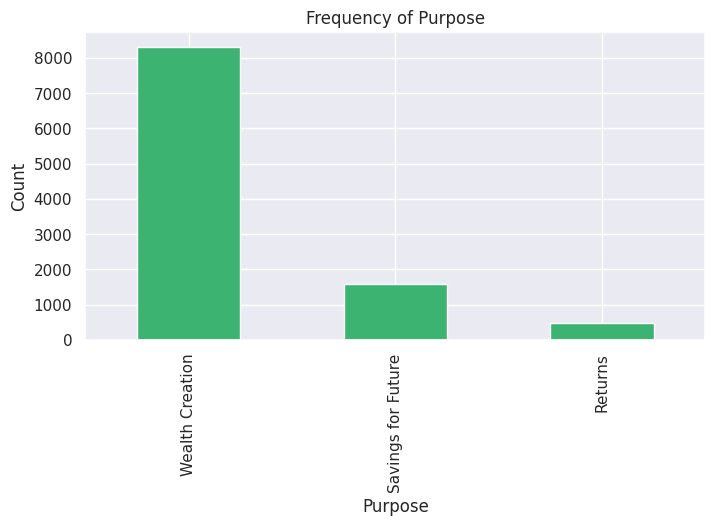

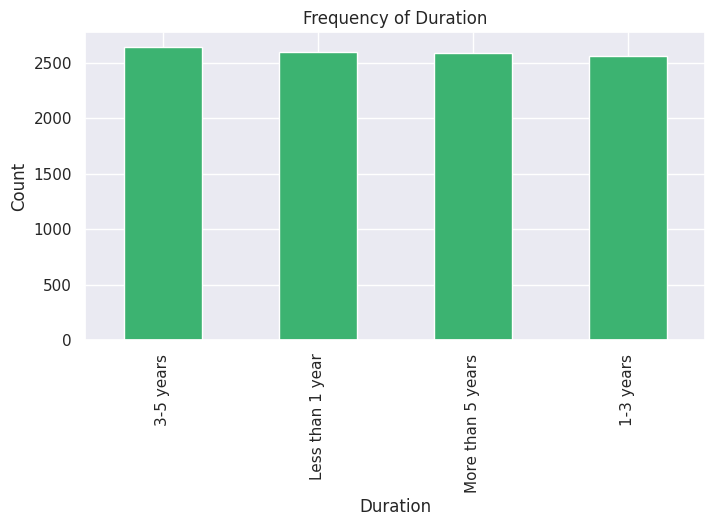

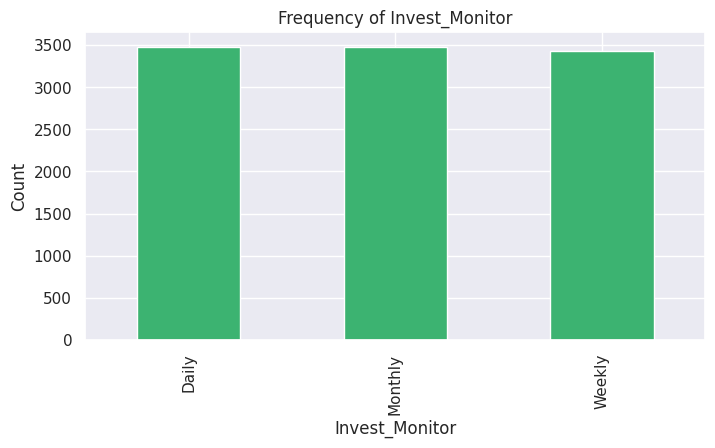

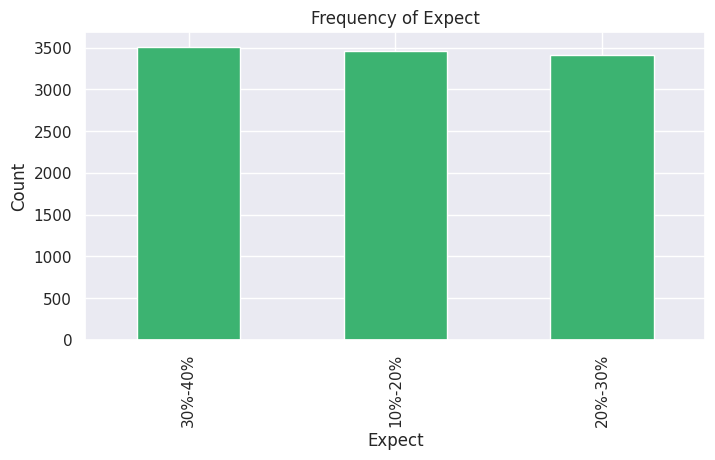

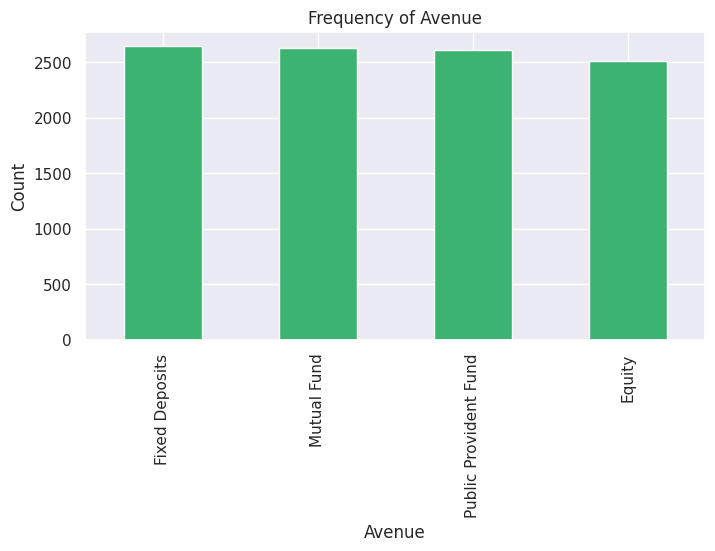

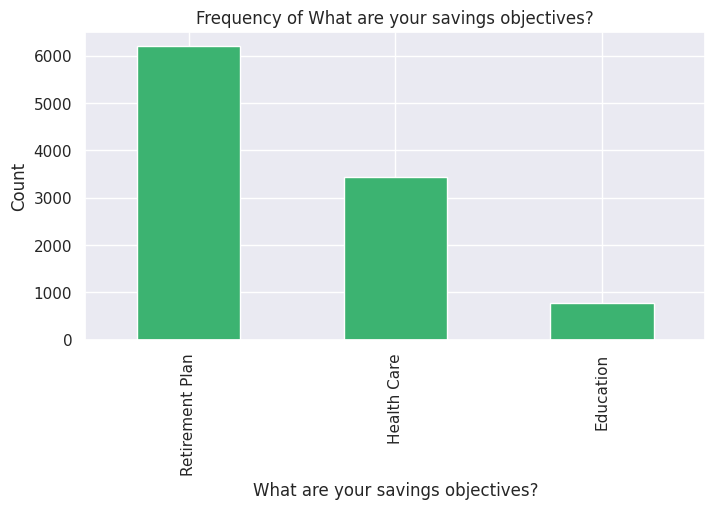

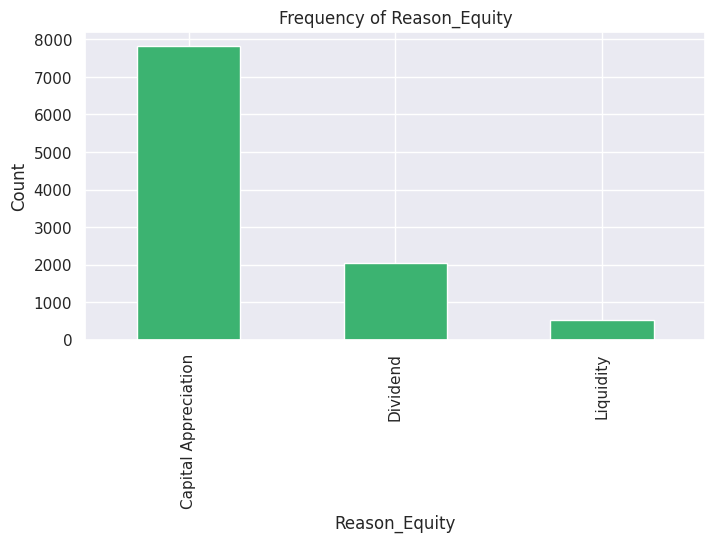

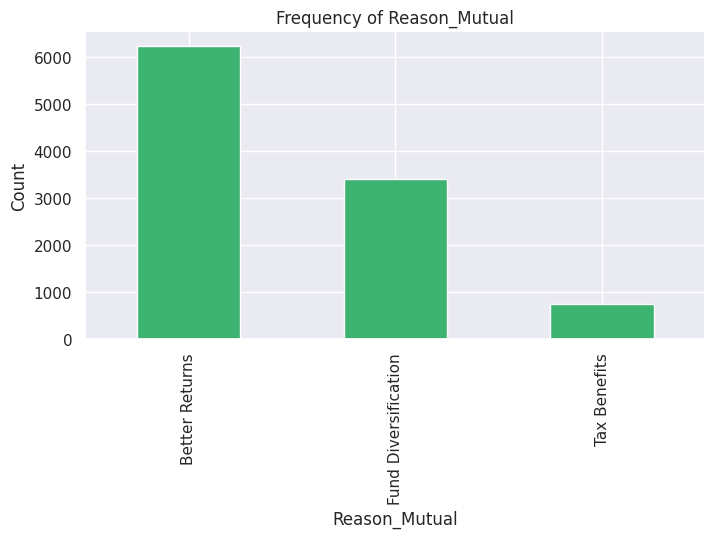

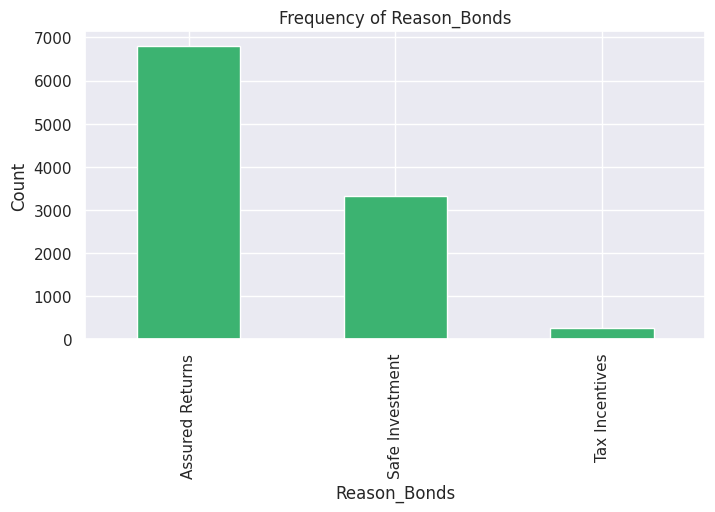

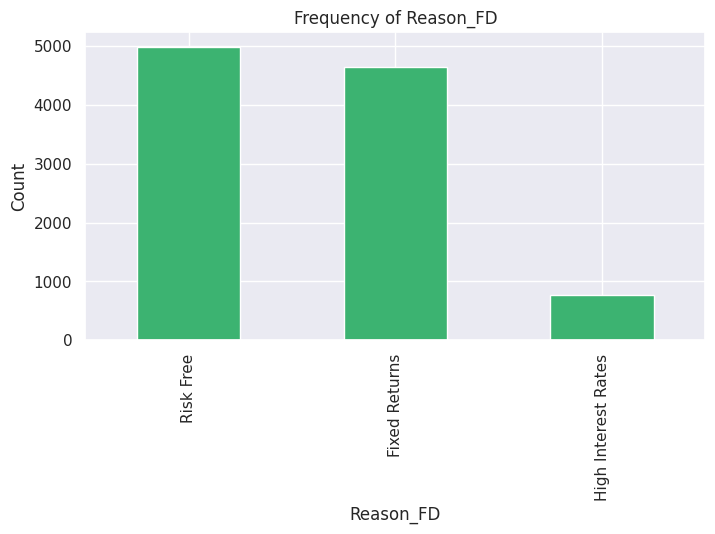

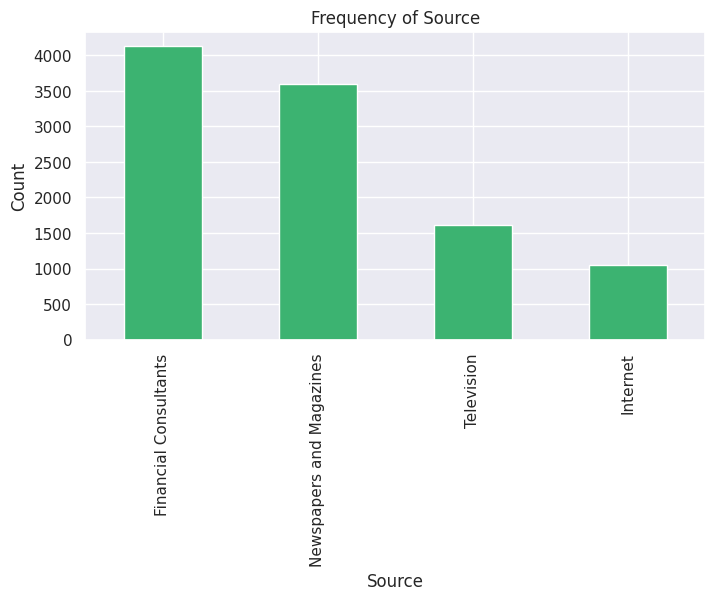

In [8]:
# Numeric columns
num_cols = df.select_dtypes(include=['int64','float']).columns

#catogaries columns
cat_cols = df.select_dtypes(include=['object']).columns

#Numeric distribution
for col in num_cols:
  plt.figure(figsize=(6,4))
  sns.distplot(df[col], kde=True, color='skyblue')
  plt.title(f'Distribution of {col}')
  plt.show()

#categerical Frequency
for col in cat_cols:
  plt.figure(figsize=(8,4))
  df[col].value_counts().plot(kind='bar', color='mediumseagreen')
  plt.title(f'Frequency of {col}')
  plt.ylabel("Count")
  plt.show()

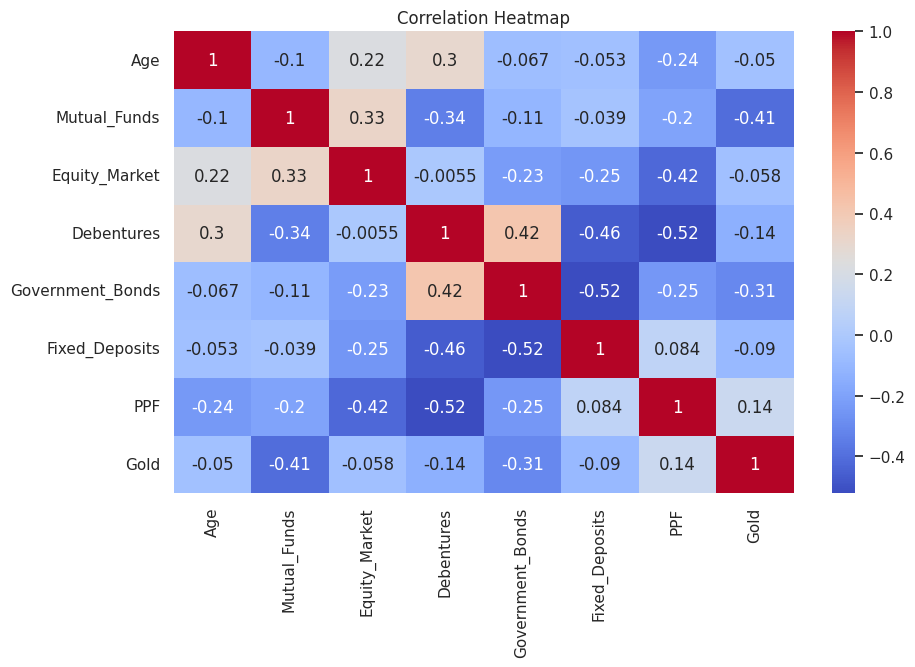

In [11]:
# correaltion heatmap ( for numeric columns)
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Gender vs Investment preference
if 'Gender' in df.columns and 'Investment Preference' in df.columns:
  plt.figure(figsize=(8,5))
  sns.countplot(x='Gender', hue='Investment Preference', data=df)
  plt.title("Gender vs Investment Preference")
  plt.show()

# Age vs Expection Returns
if 'Age' in df.columns and 'Expected Returns' in df.columns:
  plt.figure(figsize=(7, 5))
  sns.boxplot(x='Age', y='Expected Returns', data=df)
  plt.title("Age vs Expected Returns")
  plt.show()

0     20
1     30
2     10
3     10
4     10
5     10
6     30
7     10
8     10
9     30
10    30
11    30
12    30
13    10
14    20
15    20
16    20
17    30
18    10
19    20
Name: Expect, dtype: int64

✅ Average Expected Returns by Age Group:
 Age Group
25–34    20.109556
18–24    19.986708
35–44    19.442446
45–54          NaN
55–64          NaN
65+            NaN
Name: Expect, dtype: float64


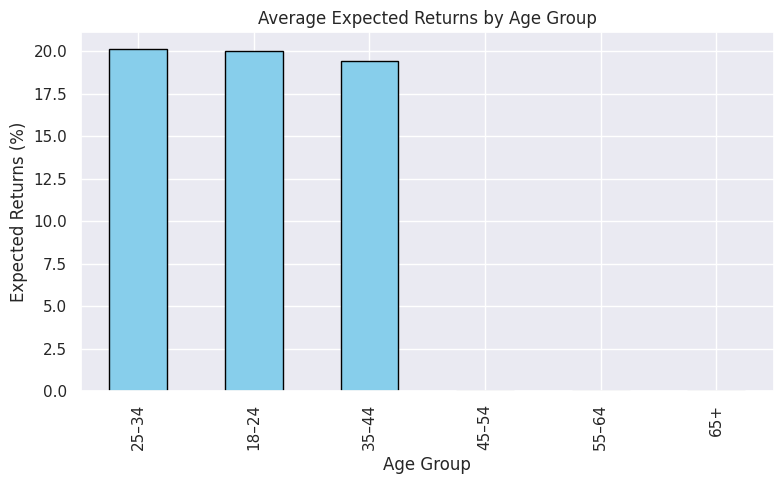

In [36]:
# Convert 'Expect' column to numeric
# Remove '%' and non-numeric characters first
df['Expect'] = df['Expect'].astype(str).str.replace('%', '', regex=False)
df['Expect'] = df['Expect'].astype(str).str.extract('(\d+\.?\d*)')[0]

# extract numeric parts only
df['Expect'] = pd.to_numeric(df['Expect'], errors='coerce')

# Check if conversion worked
print(df['Expect'].head(20))

# Drop rows where Expect is still missing
df = df.dropna(subset=['Expect'])

# Now group safely
age_expect = (df.groupby('Age Group')['Expect'].mean().sort_values(ascending=False))

print("\n✅ Average Expected Returns by Age Group:\n", age_expect)

# Plot again
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
age_expect.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Expected Returns by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Expected Returns (%)')
plt.tight_layout()
plt.show()

Columns in DataFrame: ['Gender', 'Age', 'Investment_Avenues', 'Mutual_Funds', 'Equity_Market', 'Debentures', 'Government_Bonds', 'Fixed_Deposits', 'PPF', 'Gold', 'Stock_Marktet', 'Factor', 'Objective', 'Purpose', 'Duration', 'Invest_Monitor', 'Expect', 'Avenue', 'What are your savings objectives?', 'Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD', 'Source', 'age_group', 'Age Group']
0    29
1    28
2    28
3    19
4    32
Name: Age, dtype: int64
int64
   Age Age Group
0   29     25–34
1   28     25–34
2   28     25–34
3   19     18–24
4   32     25–34
5   31     25–34
6   27     25–34
7   30     25–34
8   37     35–44
9   37     35–44

Average Expected Returns by Age Group:
 Age Group
25–34    20.109556
18–24    19.986708
35–44    19.442446
45–54          NaN
55–64          NaN
65+            NaN
Name: Expect, dtype: float64


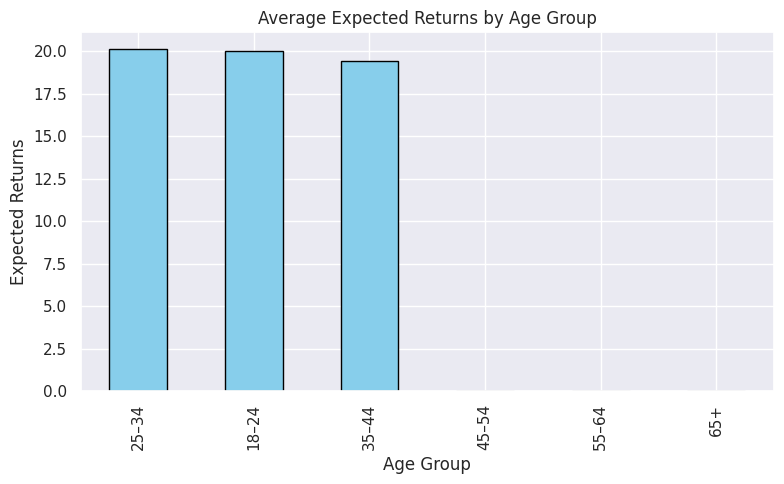

In [37]:
# Check if 'Age' column exists and its data type
print("Columns in DataFrame:", df.columns.tolist())
print(df['Age'].head())
print(df['Age'].dtype)

# Convert 'Age' to numeric if it’s stored as string
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Create age groups correctly
bins = [0, 24, 34, 44, 54, 64, 150]
labels = ['18–24','25–34','35–44','45–54','55–64','65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Confirm creation
print(df[['Age', 'Age Group']].head(10))

# Group by Age Group using 'Expect' column (Expected Returns)
age_expect = (df.groupby('Age Group')['Expect'].mean().sort_values(ascending=False))

print("\nAverage Expected Returns by Age Group:\n", age_expect)

# Bar Plot
plt.figure(figsize=(8,5))
age_expect.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Expected Returns by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Expected Returns')
plt.tight_layout()
plt.show()

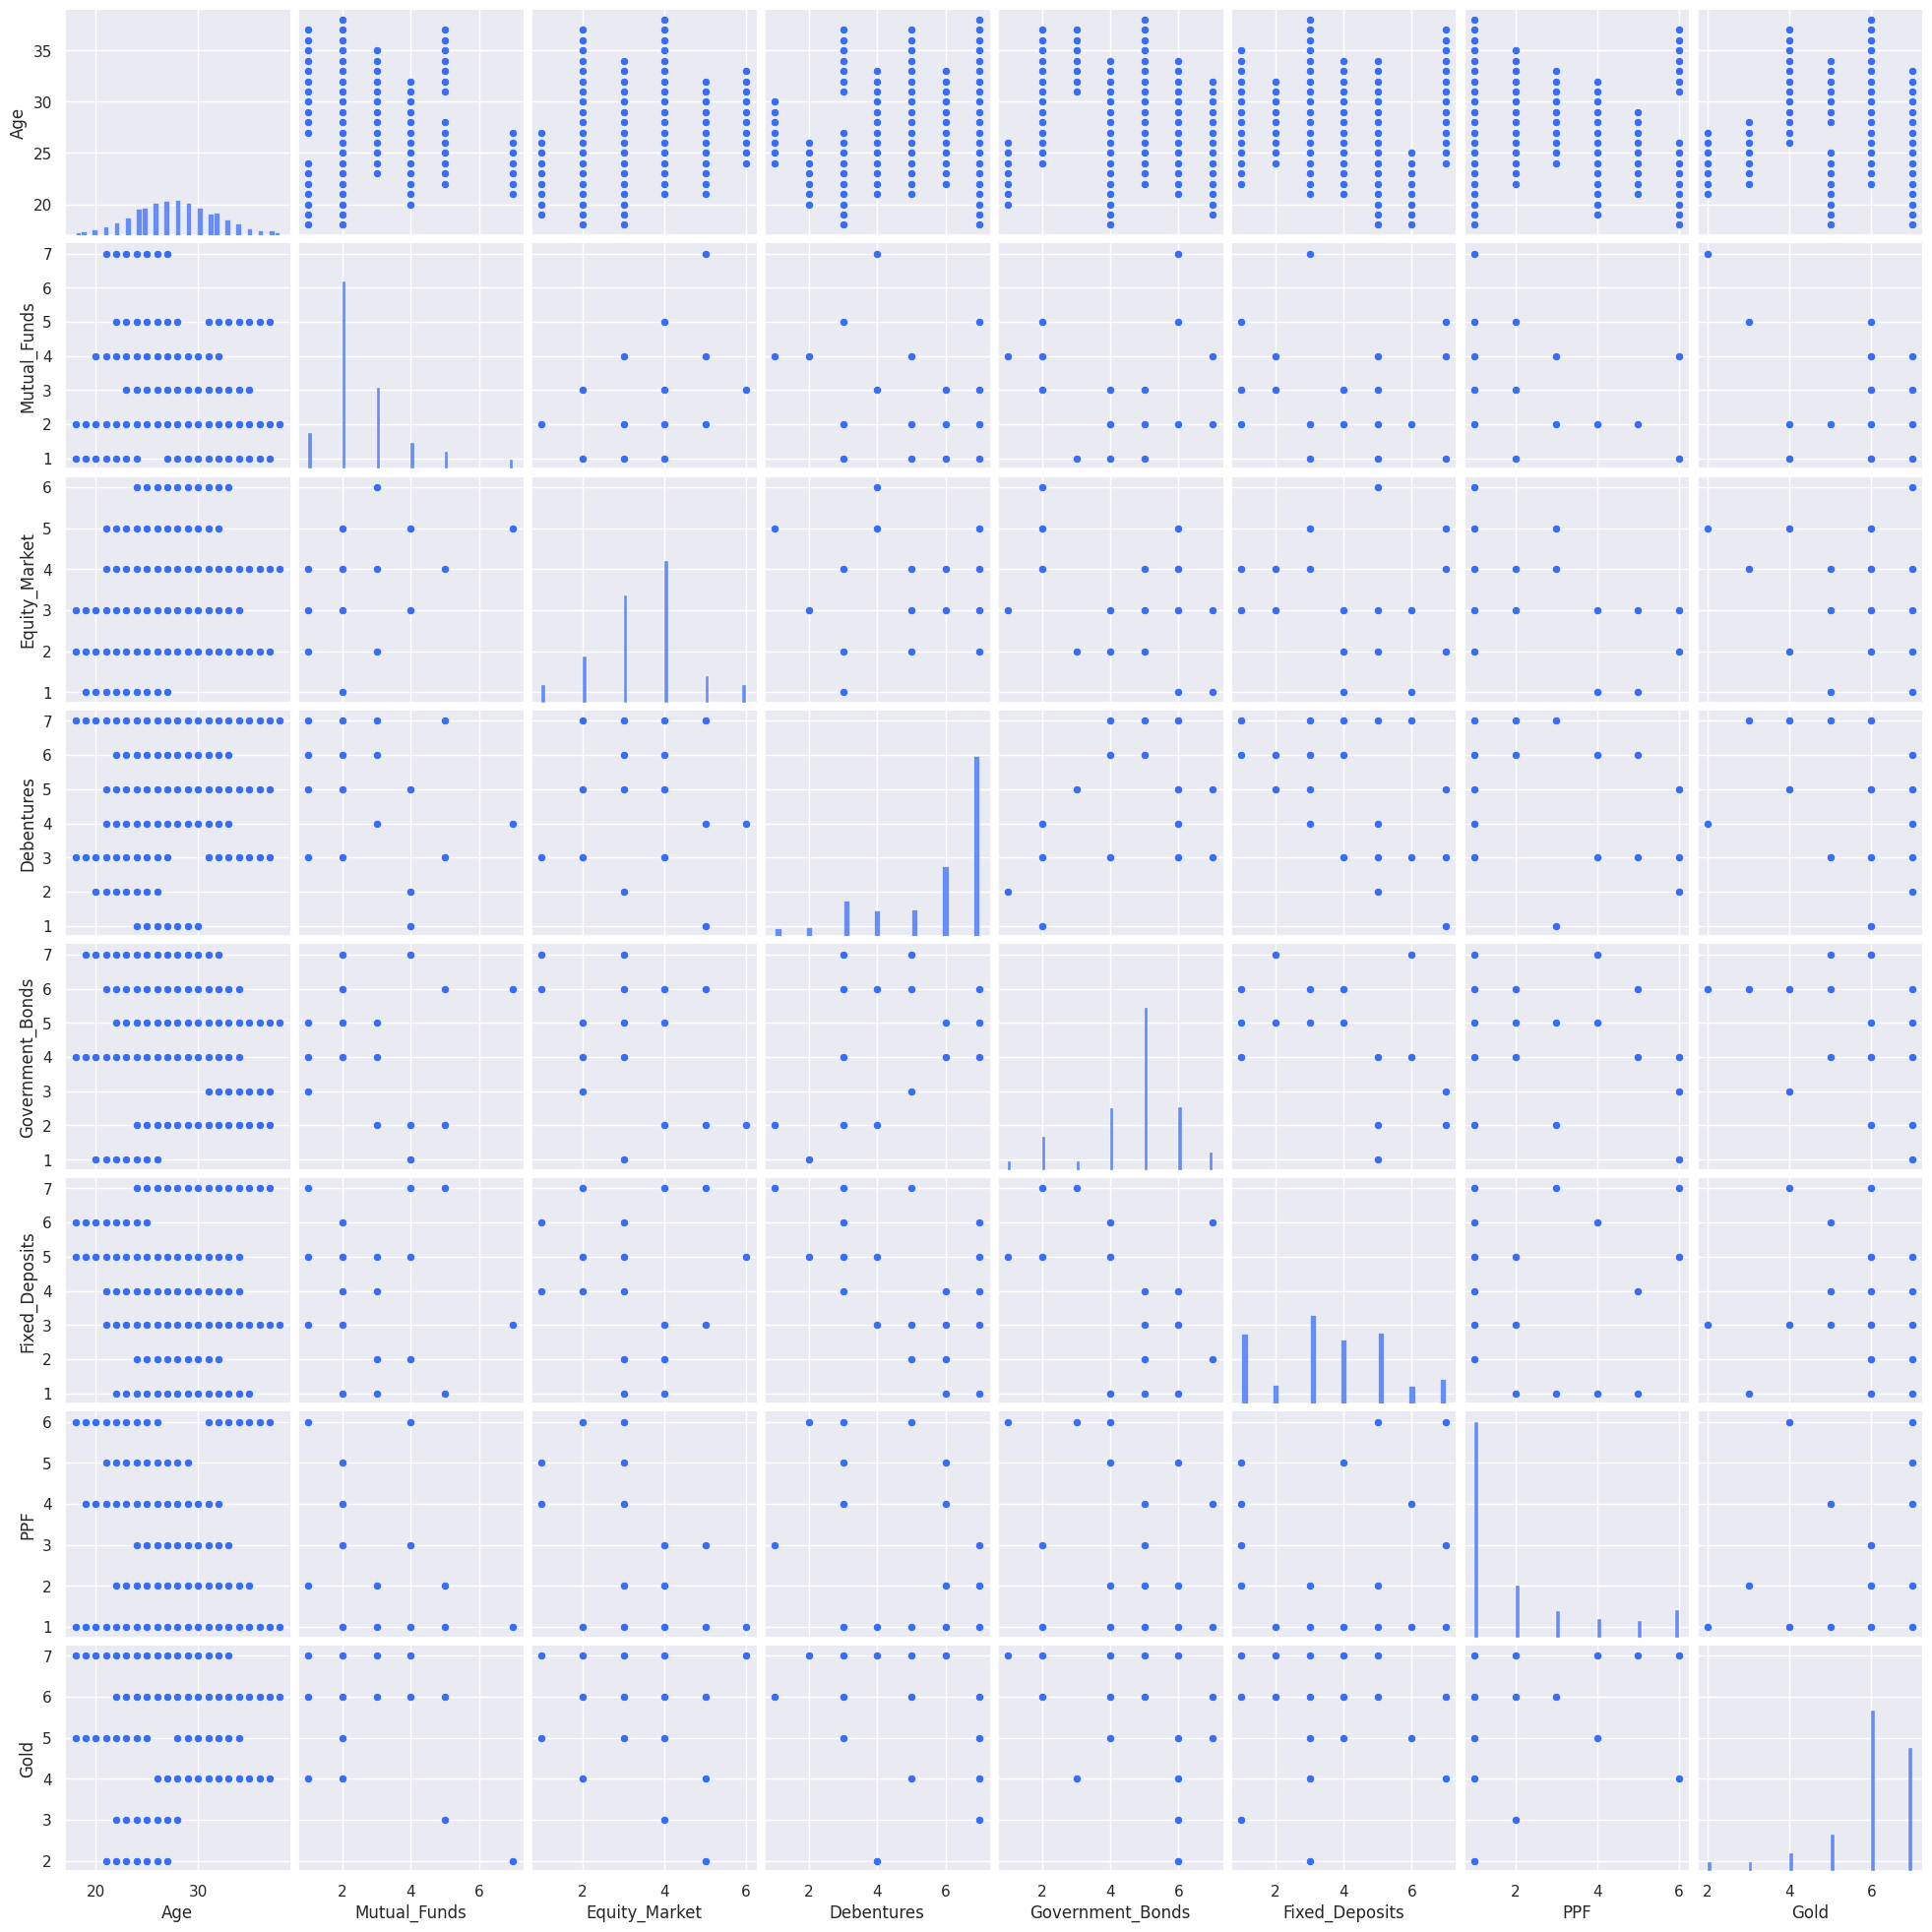

In [12]:
# Interactive scatter plot with plotly
if 'Age' in df.columns and 'Expected Returns' in df.columns:
  fig = px.scatter(df, x='Age', y='Expected return', color='Gender', size='Investment Amount', title = 'Age vs Expected Returns by Gender')
  fig.show()

#pairplot for relationships
sns.pairplot(df[num_cols])
plt.show()

In [32]:
#creating age groups from age
bins = [0, 24, 34, 44, 54, 64, 150]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

#adjust if needed
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

#double-check if column exist
print(df[['Age', 'Age Group']].head())

   Age Age Group
0   29     25–34
1   28     25–34
2   28     25–34
3   19     18–24
4   32     25–34


In [39]:
from google.colab import data_table
data_table.DataTable(df.head(100), include_index=False, num_rows_per_page=10)

,Gender,Age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source,age_group,Age Group
0,Male,29,Yes,2,4,7,5,3,1,6,...,20,Public Provident Fund,Health Care,Dividend,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines,25-34,25–34
1,Male,28,Yes,2,3,6,5,1,4,7,...,30,Public Provident Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Television,25-34,25–34
2,Female,28,Yes,2,3,7,5,4,1,6,...,10,Mutual Fund,Health Care,Dividend,Better Returns,Assured Returns,Risk Free,Financial Consultants,25-34,25–34
3,Male,19,Yes,2,3,7,4,6,1,5,...,10,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines,18-24,18–24
4,Male,32,Yes,2,4,7,5,3,1,6,...,10,Public Provident Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Fixed Returns,Financial Consultants,25-34,25–34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Male,22,Yes,2,3,7,4,6,1,5,...,20,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines,18-24,18–24
97,Male,30,Yes,2,5,7,6,3,1,4,...,10,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Financial Consultants,25-34,25–34
98,Male,25,Yes,2,3,6,4,1,5,7,...,10,Mutual Fund,Education,Dividend,Better Returns,Safe Investment,Risk Free,Newspapers and Magazines,25-34,25–34
99,Male,29,Yes,2,4,7,5,1,3,6,...,10,Mutual Fund,Health Care,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines,25-34,25–34


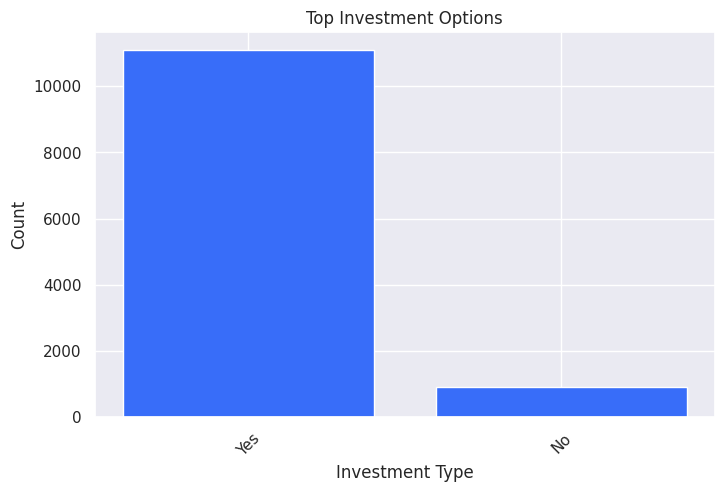

In [43]:
plt.figure(figsize=(8,5))
plt.bar(df['Investment_Avenues'].value_counts().index,
        df['Investment_Avenues'].value_counts().values)
plt.title('Top Investment Options')
plt.xlabel('Investment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Load your dataset (adjust path if stored elsewhere)
df = pd.read_csv('/content/drive/MyDrive/Finance project/Finance Trends.csv')

# Create the summary table “pop”
pop = df['Investment_Avenues'].value_counts().rename_axis('Investment').reset_index(name='Count')
pop['Percent'] = (100 * pop['Count'] / pop['Count'].sum()).round(2)

# Show the first few rows to verify
pop.head()

,Investment,Count,Percent
0,Yes,11082,92.35
1,No,918,7.65


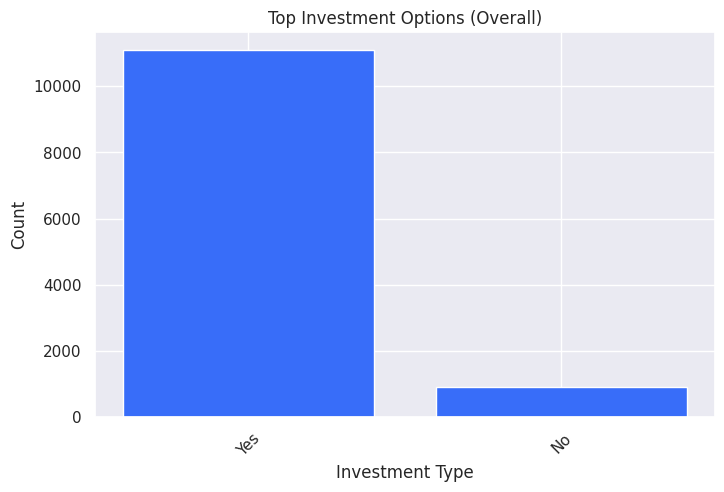

In [44]:
plt.figure(figsize=(8,5))
plt.bar(pop['Investment'], pop['Count'])
plt.title('Top Investment Options (Overall)')
plt.xlabel('Investment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

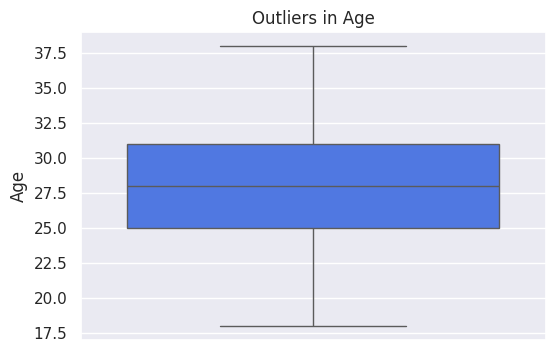

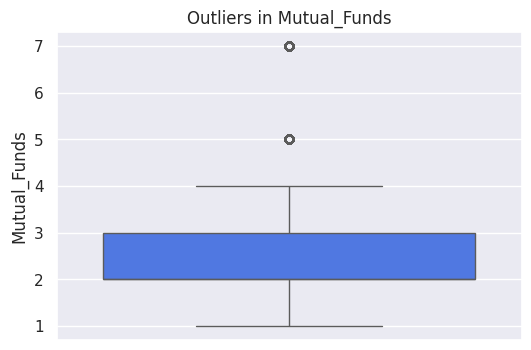

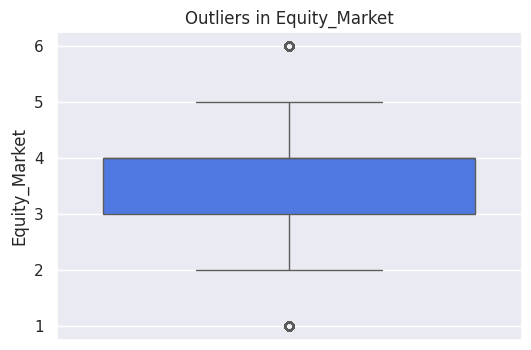

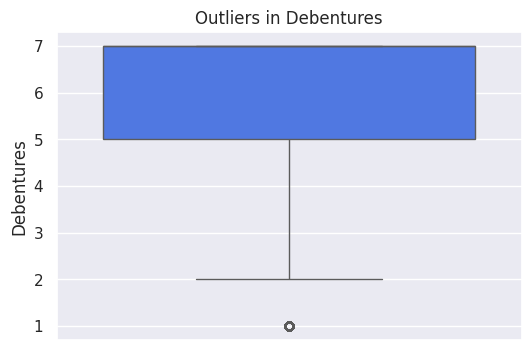

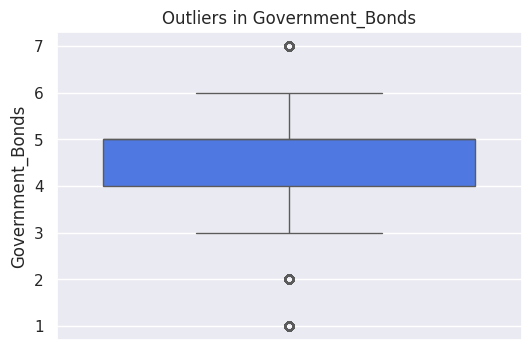

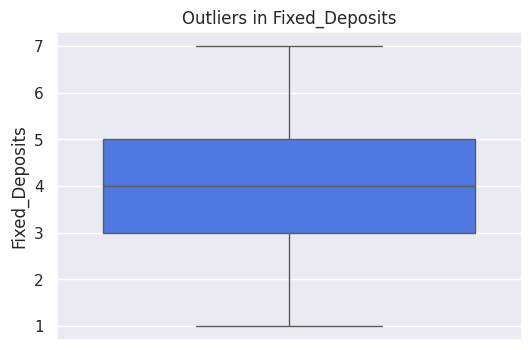

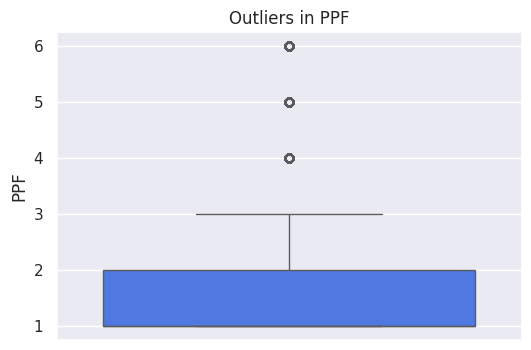

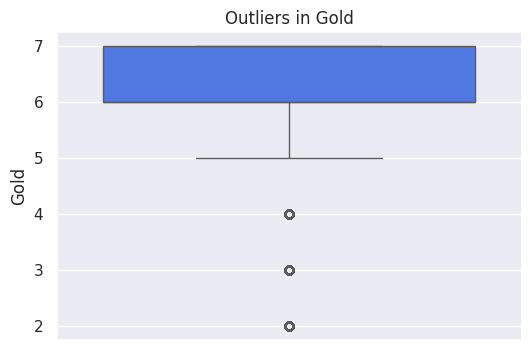

In [14]:
# outlier Detection using boxplots
for col in num_cols:
  plt.figure(figsize=(6,4))
  sns.boxplot(df[col])
  plt.title(f"Outliers in {col}")
  plt.show()

In [15]:
# Save cleaned dataset for further use
df.to_csv('FinanceTrends_cleaned.csv', index=False)
print("cleaned dataset saved succesfully")

cleaned dataset saved succesfully


In [17]:
# catogerial variables
df_encoded = pd.get_dummies(df, drop_first=True)

#corelation with target
if 'Expected Returns' in df_encoded.columns:
  corr_with_target = df_encoded.corr()['Expected Returns'].sort_values(ascending=False)
  print("Top correlated features:\n",corr_target.head(10))
